In [1]:
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np

from society.agent import Agent, TrainableAgent
from society.simulations import OnlineLearningSimulation
from society.strategies.gameplay.constant import AllC, AllD
from society.strategies.gameplay.random import RandomGameplayStrategy
from society.strategies.gameplay.tft import TitForTat
from society.strategies.selection.greedy import (
    EGreedySelectionStrategy,
    GreedySelectionStrategy,
)
from society.strategies.selection.qlearning import QLearningSelectionStrategy
from society.strategies.selection.random import RandomSelectionStrategy
from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (10, 6)

c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\numeric.py:1211: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = asanyarray(a)


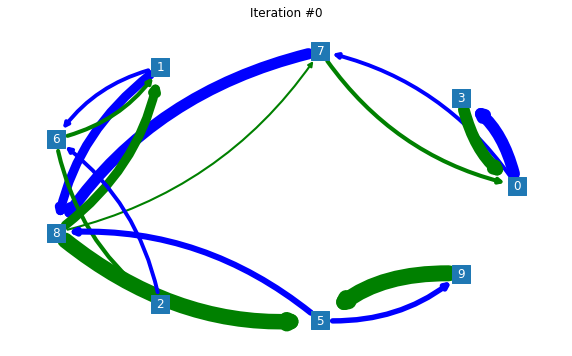

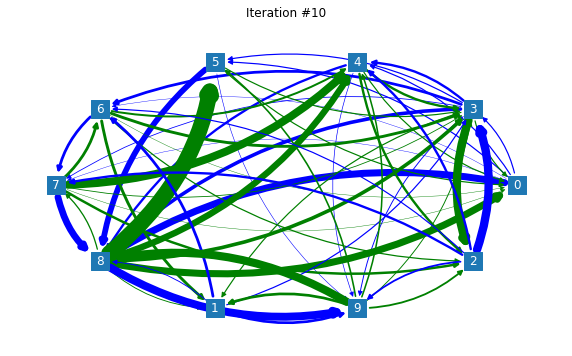

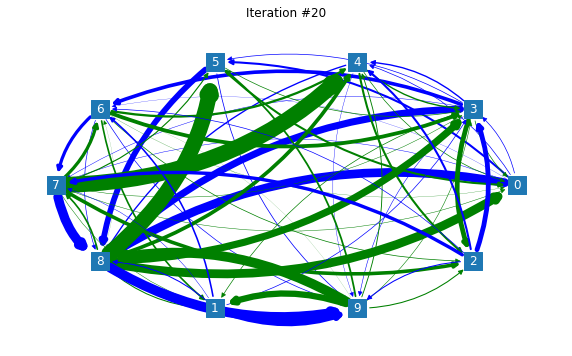

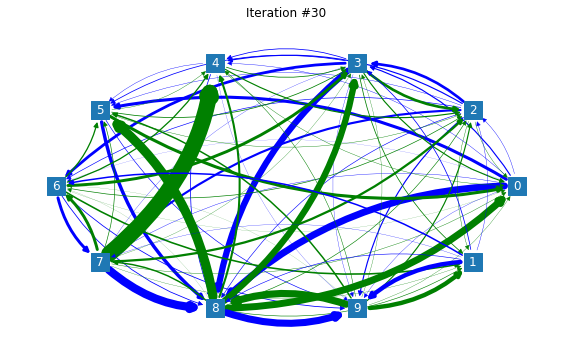

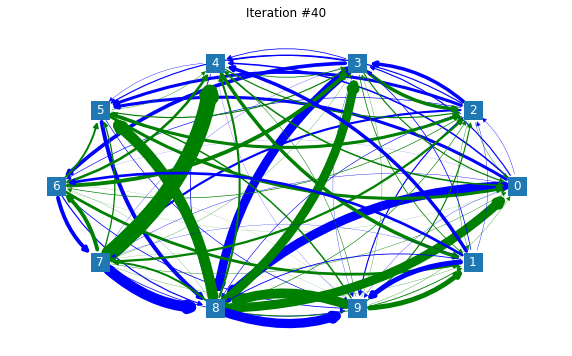

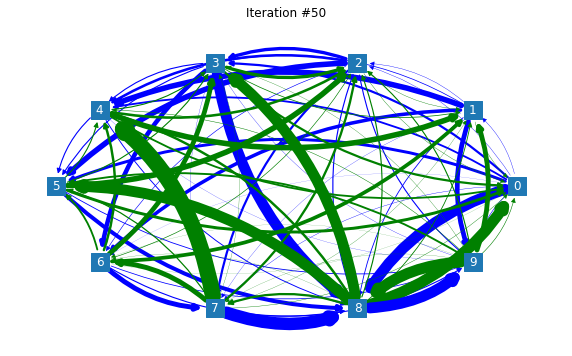

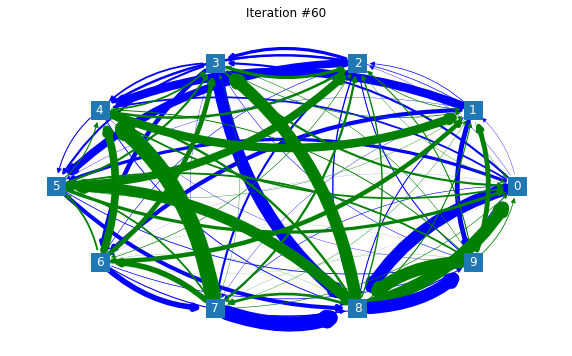

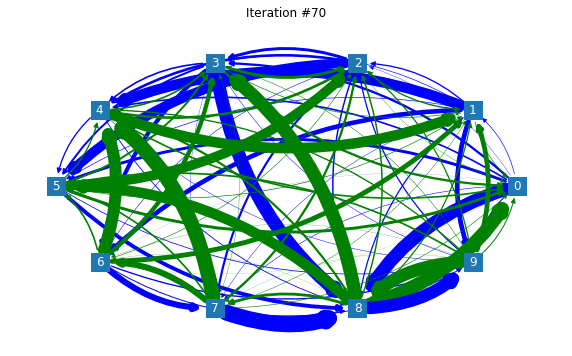

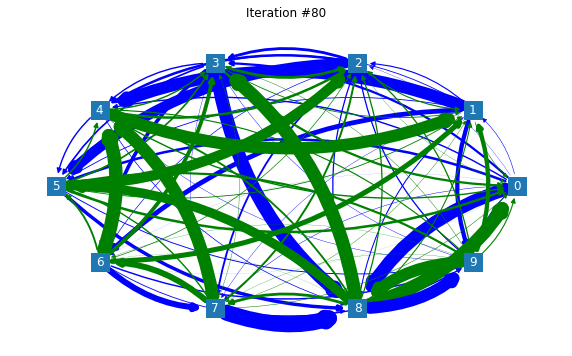

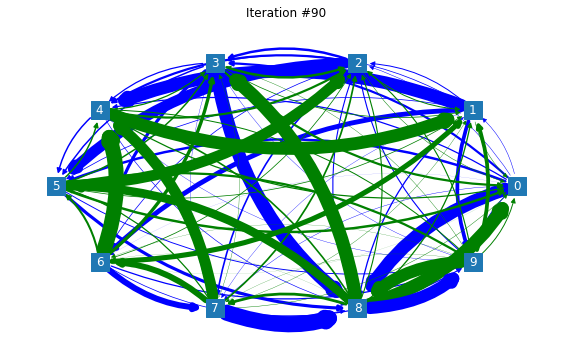

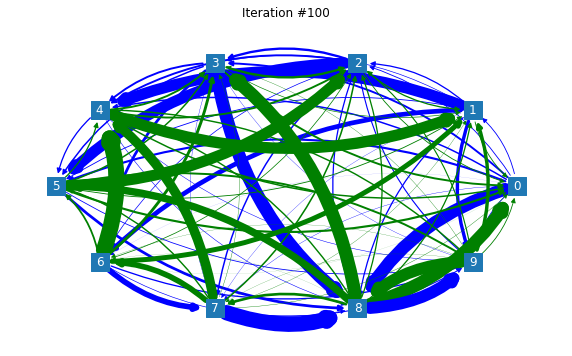

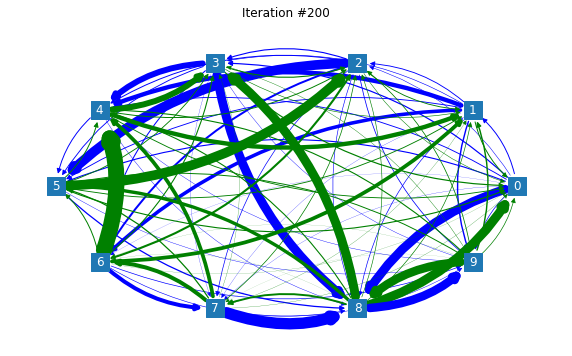

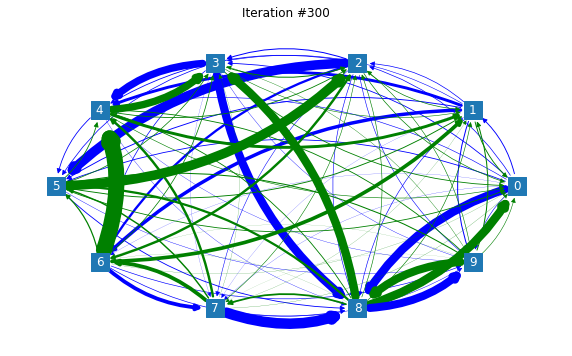

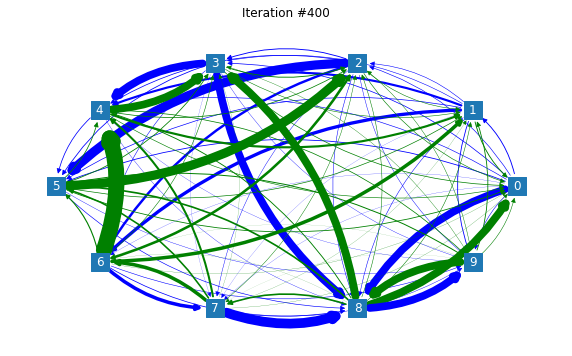

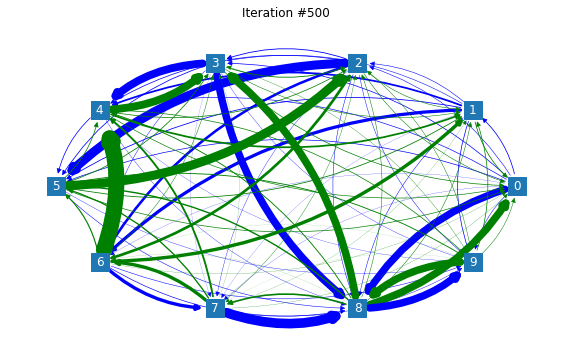

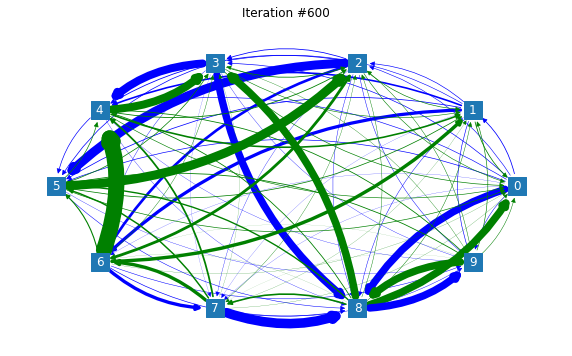

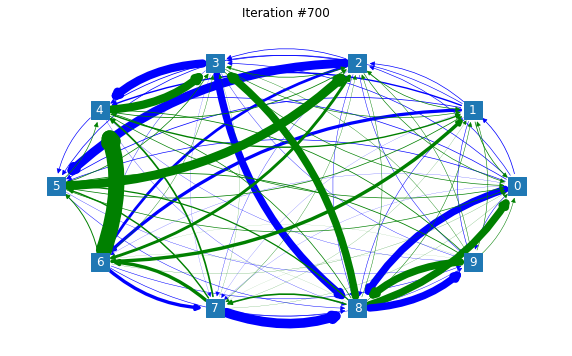

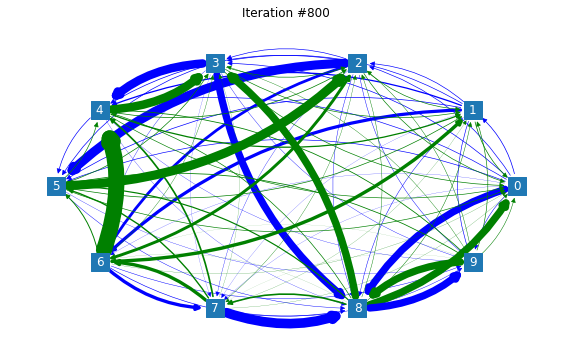

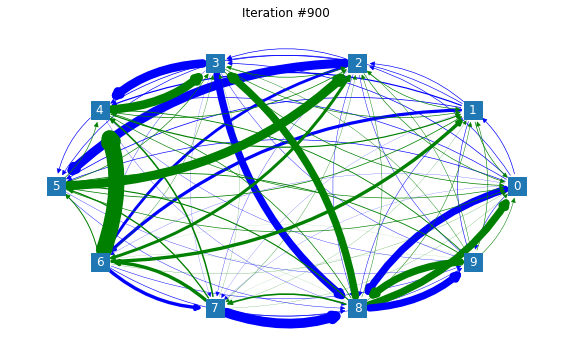

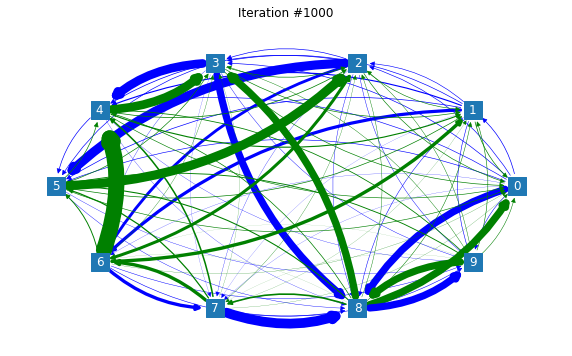

In [2]:
POPULATION = 10
ts = datetime.datetime.now().strftime("%Y-%m-%d %H-%M-%S")
os.makedirs(f"images/{ts}")

agents = [
    TrainableAgent(QLearningSelectionStrategy(POPULATION), TitForTat(), 0, POPULATION),                 # 0
    TrainableAgent(QLearningSelectionStrategy(POPULATION), TitForTat(), 0, POPULATION),                 # 1
    TrainableAgent(QLearningSelectionStrategy(POPULATION), TitForTat(), 0, POPULATION),                 # 2
    TrainableAgent(QLearningSelectionStrategy(POPULATION), TitForTat(), 0, POPULATION),                 # 3
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllC(), 0, POPULATION),                      # 4
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllC(), 0, POPULATION),                      # 5
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllD(), 0, POPULATION),                      # 6
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllD(), 0, POPULATION),                      # 7
    TrainableAgent(QLearningSelectionStrategy(POPULATION), RandomGameplayStrategy(), 0, POPULATION),    # 8
    TrainableAgent(QLearningSelectionStrategy(POPULATION), RandomGameplayStrategy(), 0, POPULATION),    # 9
]

for agent in agents:
    agent.selection_strategy._epsilon = 0.25

sim = OnlineLearningSimulation(agents)
sim.reset()

for i in range(1001):
    sim.play_round()

    if (i < 100 and i % 10 == 0) or (i >= 100 and i % 100 == 0):
        plot_graph(make_graph(sim.returns), title=f"Iteration #{i}")
        plt.savefig(f"images/{ts}/{i}.png")
        # plt.show()


In [3]:
# Returns by agent
print("  ", *[f"{i:<8}" for i in range(POPULATION)])
print("  ", "=" * (9 * POPULATION - 1))
for index, agent in enumerate(sim.returns):
    returns_by_partner = [sum(r) if len(r) > 0 else 0 for r in agent]
    print(
        f"{index}:",
        *[f"{r:<8}" for r in returns_by_partner],
        "=>",
        sum(returns_by_partner),
    )

   0        1        2        3        4        5        6        7        8        9       
0: 0        17100    15600    16200    15300    15000    5346     4455     177109   12765    => 278875
1: 17100    0        14700    16200    27900    16800    78903    3663     12582    13998    => 201846
2: 15600    14700    0        16200    18000    225000   70488    6930     10369    10925    => 388212
3: 16200    16200    16200    0        213000   16200    7623     4455     178040   10186    => 478104
4: 15300    27900    18000    213000   0        16800    0        0        6504     7176     => 304680
5: 15000    16800    225000   16200    16800    0        0        0        9960     8484     => 308244
6: 5616     82888    74048    8008     394500   23500    0        82200    14120    11640    => 696520
7: 4680     3848     7280     4680     38000    30500    82200    0        240964   13636    => 425788
8: 178999   12737    10509    180045   17664    26360    2345     40384    0       

[6, 8, 3, 7, 2, 5, 4, 0, 9, 1]


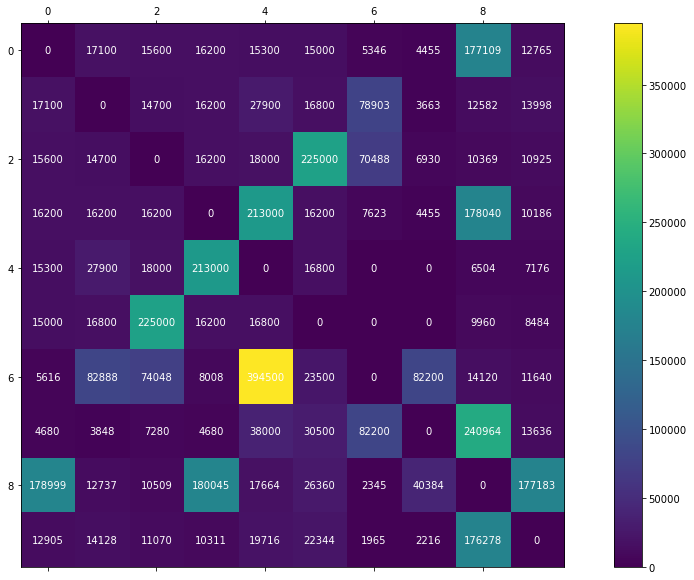

In [4]:
returns_matrix = [[sum(r) if len(r) > 0 else 0 for r in agent] for agent in sim.returns]
ranked_partners = sorted(range(POPULATION), key=lambda i: sum(returns_matrix[i]), reverse=True)
print(ranked_partners)

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111)
m = ax.matshow(returns_matrix)
fig.colorbar(m)

for (i, j), z in np.ndenumerate(returns_matrix):
    ax.text(
        j,
        i,
        "{:0.0f}".format(z),
        ha="center",
        va="center",
        color="white"
    ) # bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3')


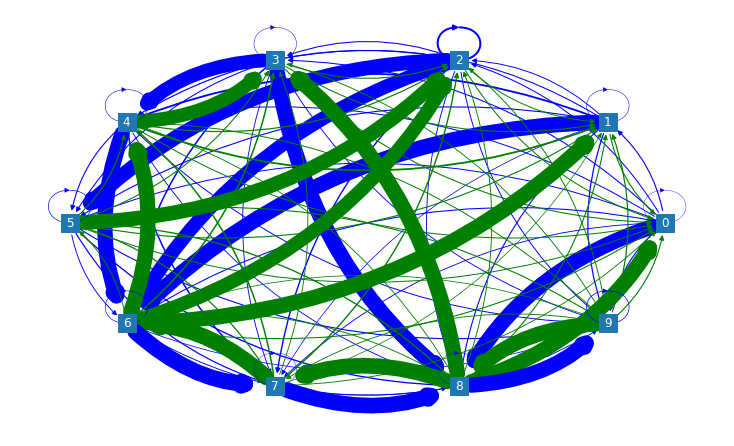

In [5]:
plot_graph(make_frequencies_graph(sim.returns))

In [6]:
# Frequencies by agent
print("  ", *[f"{i:<8}" for i in range(POPULATION)])
print("  ", "=" * (9 * POPULATION - 1))
for index, agent in enumerate(sim.returns):
    frequencies_by_partner = [len(r) if len(r) > 0 else 0 for r in agent]
    print(
        f"{index}:",
        *[f"{r:<8}" for r in frequencies_by_partner],
        "=>",
        sum(frequencies_by_partner),
    )

   0        1        2        3        4        5        6        7        8        9       
0: 18       57       52       54       51       50       54       45       789      57       => 1227
1: 57       26       49       54       93       56       797      37       56       62       => 1287
2: 52       49       102      54       60       750      712      70       47       49       => 1945
3: 54       54       54       24       710      54       77       45       796      46       => 1914
4: 51       93       60       710      28       56       789      76       44       49       => 1956
5: 50       56       750      54       56       34       47       61       66       56       => 1230
6: 54       797      712      77       789      47       32       822      47       39       => 3416
7: 45       37       70       45       76       61       822      20       805      45       => 2026
8: 789      56       47       796      44       66       47       805      20       784      => 345